In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [2]:
filename = '/home/duarte/Documentos/mestrado-INPE/aulas/termodinamica/lista_3/cloud.nc'
ds = xr.open_dataset(filename)

In [3]:
print(ds)

<xarray.Dataset> Size: 3GB
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1kB 2015-04-07 ... 2015-04-12T23:00:00
Data variables:
    hcc        (time, latitude, longitude) float32 598MB ...
    lcc        (time, latitude, longitude) float32 598MB ...
    mcc        (time, latitude, longitude) float32 598MB ...
    tcc        (time, latitude, longitude) float32 598MB ...
    tp         (time, latitude, longitude) float32 598MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-03 02:54:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


In [4]:
time = ds.time
time = pd.to_datetime (time.data)
lat = ds.latitude
lon = ds.longitude

# Variáveis

hcc = ds['hcc']
lcc = ds['lcc']
mcc = ds['mcc']
tcc = ds['tcc']
tp = ds['tp']

In [8]:
print(time)

DatetimeIndex(['2015-04-07 00:00:00', '2015-04-07 01:00:00',
               '2015-04-07 02:00:00', '2015-04-07 03:00:00',
               '2015-04-07 04:00:00', '2015-04-07 05:00:00',
               '2015-04-07 06:00:00', '2015-04-07 07:00:00',
               '2015-04-07 08:00:00', '2015-04-07 09:00:00',
               ...
               '2015-04-12 14:00:00', '2015-04-12 15:00:00',
               '2015-04-12 16:00:00', '2015-04-12 17:00:00',
               '2015-04-12 18:00:00', '2015-04-12 19:00:00',
               '2015-04-12 20:00:00', '2015-04-12 21:00:00',
               '2015-04-12 22:00:00', '2015-04-12 23:00:00'],
              dtype='datetime64[ns]', length=144, freq=None)


In [5]:
mean = np.mean(hcc, axis=0)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_6773/1254593738.py:7: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel ('Longitude $^\degree$', fontsize = fs)
/tmp/ipykernel_6773/1254593738.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel ('Latitude $^\degree$', fontsize = fs)
/tmp/ipykernel_6773/1254593738.py:2: UserWarning: The following kwargs were not used by contour: 'cmpa'
  cs = plt.contourf(lon, lat, mean, cmpa = 'jet')


(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
          80.,  100.]),
 [Text(0, -100.0, '−100'),
  Text(0, -80.0, '−80'),
  Text(0, -60.0, '−60'),
  Text(0, -40.0, '−40'),
  Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

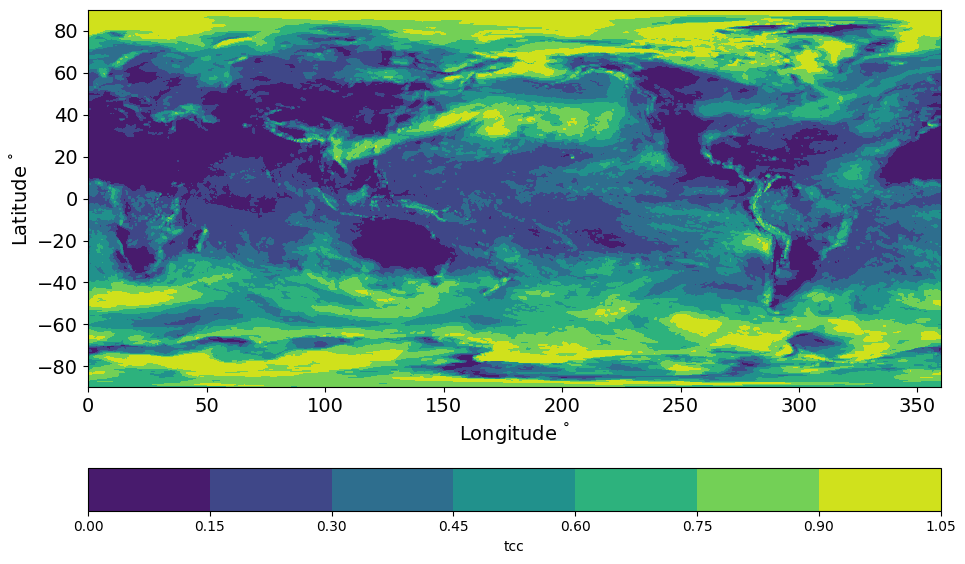

In [6]:
fig = plt.figure(figsize=(11,7))
cs = plt.contourf(lon, lat, mean, cmpa = 'jet')
cbar = plt.colorbar(cs, label = 'tcc', orientation = 'horizontal')

fs = 14

plt.xlabel ('Longitude $^\degree$', fontsize = fs)
plt.ylabel ('Latitude $^\degree$', fontsize = fs)
plt.xticks (fontsize = fs)
plt.yticks (fontsize = fs)

#contour = plt.contour (lon, lat, mean, np.arange(-5, 35, 5), linestyles=':', linewidth=0.5, colors='k')
#plt.clabel(contour, fontsize=13, inline=1, fmt='%1.0f')



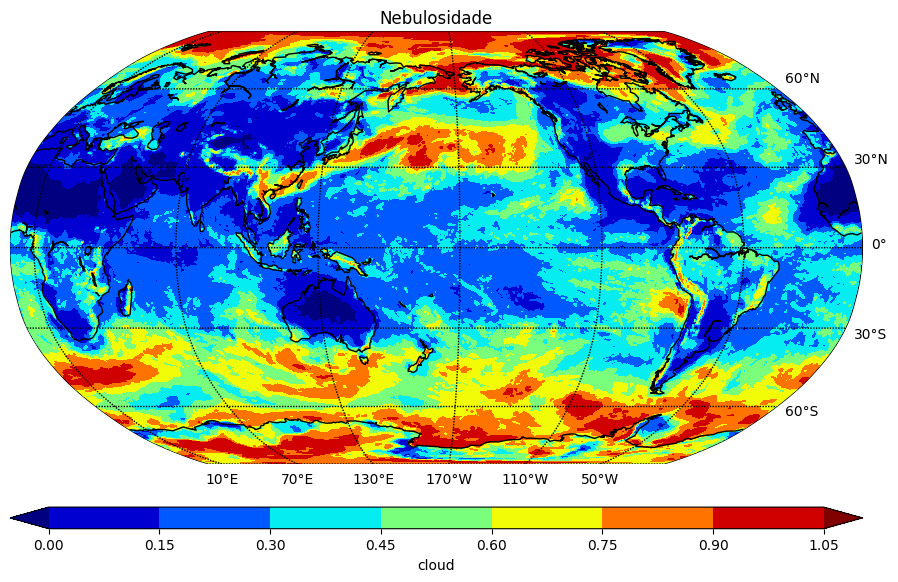

In [7]:
fig = plt.figure(figsize=(11,7))
plt.title('Nebulosidade')

m = Basemap(projection='robin',lon_0=180)
m.drawcoastlines()
x,y = np.meshgrid(lon, lat)
px, py = m(x,y)

# plot
cs = m.contourf(px, py, mean, np.arange(-0, 1.05, 0.15), extend='both', cmap='jet')
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('cloud')

paralelos = np.arange(-90.,91,30.)
m.drawparallels(paralelos, labels=[False, True, True, False])

meridiano = np.arange(10., 351.,60.)
m.drawmeridians(meridiano, labels=[True, False, False, True])


plt.show()


In [ ]:
fig = plt.figure(figsize=(11,7))
plt.title('Nebulosidade')

m = Basemap(projection='robin',lon_0=180)
m.drawcoastlines()
x,y = np.meshgrid(lon, lat)
px, py = m(x,y)

#plot
cs = m.contourf(px, py, mean, np.arange(-2, 1.5, 0.1), extend='both', cmap = 'jet')
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('$^\degree$ C')

#plot contorno

contour = plt.contour (px, py, mean, np.arange(-2, 1.5, 0.1), linestyles=':', linewidth=0.5, colors='k')
plt.clabel(contour, fontsize=13, inline=1, fmt='%1.0f')

paralelos = np.arange(-90.,91,30.)
m.drawparallels(paralelos, labels=[False, True, True, False])

meridiano = np.arange(10., 351.,60.)
m.drawmeridians(meridiano, labels=[True, False, False, True])

x1, y1 = m(-90,-20)
x2, y2 = m(-90,-20)
x3, y3 = m(-150,-20)
x4, y4 = m(-150,-20)